In [1]:
!pip install datasets
!pip install matplotlib
!pip install evaluate
!pip install scipy
!pip install -U scikit-learn
!pip install tensorboard

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 20.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0


In [52]:
import LoRATuner as lt
from peft import LoraConfig
import PlottingUtils as pu

import importlib
importlib.reload(lt)
importlib.reload(pu)

<module 'PlottingUtils' from '/Users/kaushikvemparala/YodaNLP/gpt_code/PlottingUtils.py'>

In [36]:
lora_tuner = lt.LoRATuner("gpt2", 42)
lora_tuner.print_num_trainable_features()

trainable params: 124439808 || all params: 124439808 || trainable%: 100.00


In [37]:
config = LoraConfig(
        r=32, # EDIT
        lora_alpha=32,
        # target_modules=["attn/c_attn", "attn/c_proj", "mlp/c_fc", "mlp/c_proj"], # EDIT
        target_modules=["c_proj", "c_attn", "mlp/c_fc", "mlp/c_proj"],
        lora_dropout=0.1,
        bias="lora_only",
        modules_to_save=["decode_head"],
    )

In [56]:
lora_tuner.tune("train_text.txt", "val_data_final_lite.txt", "test_output3", config, save_steps = 100, eval_steps = 100, logging_steps = 100, max_steps = 1000, seed = 42)


../data/val_data_final_lite.txt
../data/train_text.txt


/opt/homebrew/lib/python3.11/site-packages/peft/tuners/lora/model.py:311: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


./logs/test_output3


 10%|█         | 100/1000 [00:33<04:57,  3.03it/s]

{'loss': 3.6667, 'learning_rate': 4.5e-05, 'epoch': 0.04}



 10%|█         | 100/1000 [00:33<04:57,  3.03it/s]

{'eval_loss': 2.5953292846679688, 'eval_runtime': 0.4384, 'eval_samples_per_second': 45.617, 'eval_steps_per_second': 6.843, 'epoch': 0.04}


 20%|██        | 200/1000 [01:06<04:17,  3.11it/s]

{'loss': 2.6678, 'learning_rate': 4e-05, 'epoch': 0.07}



 20%|██        | 200/1000 [01:06<04:17,  3.11it/s]

{'eval_loss': nan, 'eval_runtime': 0.3643, 'eval_samples_per_second': 54.901, 'eval_steps_per_second': 8.235, 'epoch': 0.07}


 30%|███       | 300/1000 [01:38<03:44,  3.11it/s]

{'loss': 0.0, 'learning_rate': 3.5e-05, 'epoch': 0.11}



 30%|███       | 300/1000 [01:39<03:52,  3.02it/s]


{'eval_loss': nan, 'eval_runtime': 0.36, 'eval_samples_per_second': 55.563, 'eval_steps_per_second': 8.334, 'epoch': 0.11}
{'train_runtime': 99.4495, 'train_samples_per_second': 40.221, 'train_steps_per_second': 10.055, 'train_loss': 2.1114990234375, 'epoch': 0.11}


In [31]:
pipe = lt.LoRATuner.create_pipeline("test_output/checkpoint-2500")


In [32]:
print(lt.LoRATuner.get_response(pipe, "User: Tell me about the French Revolution", 8))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


User: Tell me about the French Revolution.
Yoda: A process that is ongoing, the French Revolution represents. 



In [57]:
plotter = pu.Plotter("test_output3")
plotter.print_potential_scalars()

['train/loss', 'train/learning_rate', 'train/epoch', 'eval/loss', 'eval/runtime', 'eval/samples_per_second', 'eval/steps_per_second', 'train/train_runtime', 'train/train_samples_per_second', 'train/train_steps_per_second', 'train/total_flos', 'train/train_loss']


[3.6666998863220215, 2.667799949645996, 0.0]


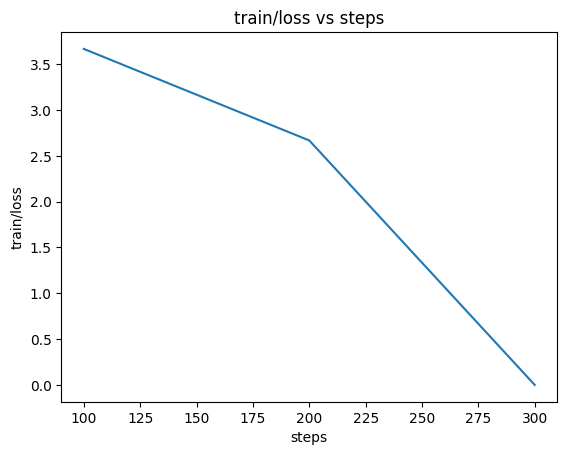

In [58]:
plotter.plot_scalars(['train/loss'])